### 사전 작업

In [1]:
#라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
from keras.models import load_model, Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import os, sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#드라이브에 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 학습 데이터 불러오기 및 개수 확인
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
print("학습셋 이미지 수: %d 개" %(train_images.shape[0]))
print("테스트셋 이미지 수: %d 개" %(test_images.shape[0]))

11490434/11490434 [==============================] - 0s 0us/step
학습셋 이미지 수: 60000 개
테스트셋 이미지 수: 10000 개


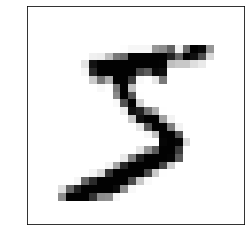

class: 5


In [4]:
#이미지 확인
plt.imshow(train_images[0], cmap='Greys')
plt.xticks()
plt.yticks()
plt.tick_params(labelcolor='white', color='white') #다크모드용 색 지정
plt.show()
print("class: %d" %(train_labels[0]))

In [5]:
#이미지 전처리
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))/255
test_images = test_images.reshape((10000, 28, 28, 1))/255

In [6]:
env_path = '/content/notebooks'
# Colab Notebooks 안에 my_env 폴더에 패키지 저장
os.symlink('/content/drive/My Drive/Colab Notebooks/env1', env_path)
sys.path.insert(0, env_path)

###은닉층 설계

In [80]:
model=models.Sequential()

In [81]:
#인코딩
model.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (4,4), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (4,4), activation='relu'))
model.add(layers.Dropout(0.2))

In [82]:
#디코딩
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

In [83]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 9, 9, 64)          32832     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 1, 1, 64)          65600     
                                                                 
 dropout_5 (Dropout)         (None, 1, 1, 64)        

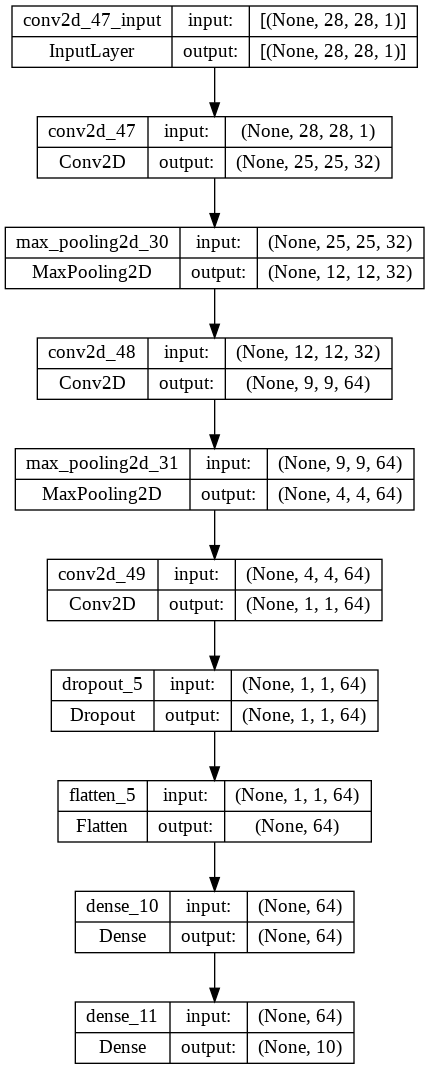

In [84]:
keras.utils.plot_model(model, "test_model.png", show_shapes=True)

In [85]:
checkpoint_path = '/content/drive/MyDrive/Colab Notebooks/cpkt/cp--{epoch:04d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0,
                                                 save_freq='epoch',
                                                 )  # 5번째 에포크마다 가중치를 저장

###학습

In [86]:
# 학습과정 설정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 학습 및 평가
model.fit(train_images, train_labels, epochs=50)
model.evaluate(test_images, test_labels)

history = model.fit(train_images, train_labels, epochs=50, validation_split=0.2, callbacks=[cp_callback])
#model.evaluate(test_images, test_labels)

Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2706 - accuracy: 0.9280
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0869 - accuracy: 0.9752
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0601 - accuracy: 0.9828
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0489 - accuracy: 0.9851
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0399 - accuracy: 0.9883
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0326 - accuracy: 0.9906
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0292 - accuracy: 0.9912
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0236 - accuracy: 0.9932
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0245 - accuracy: 0.9928
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.019

In [87]:
!ln -s /content/drive/MyDrive/ /mydrive

ln: failed to create symbolic link '/mydrive/MyDrive': File exists


In [88]:
%cd /mydrive

/content/drive/MyDrive


In [89]:
!mkdir mnist

mkdir: cannot create directory ‘mnist’: File exists


In [90]:
# 결과 저장
model.save('mnist/mnist_model.h5')

In [91]:
loaded_model = load_model('mnist/mnist_model.h5')
#loaded_model.predict(test_images[0])

In [92]:
test_images[0].shape

(28, 28, 1)

In [93]:
x = test_images[0].reshape(1, 28, 28, 1)
y = loaded_model.predict(x)

1/1 [==============================] - 0s 99ms/step


In [94]:

np.argmax(y) 

7

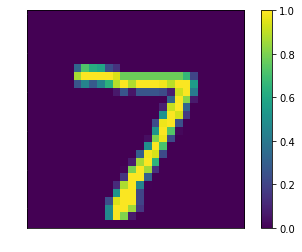

In [95]:
img = test_images[0].reshape(28, 28)
plt.figure()
plt.imshow(img)
plt.tick_params(labelcolor='white', color='white') #다크모드용 색 지정
plt.colorbar()
plt.grid(False)
plt.show()

In [96]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)
print('\n')

313/313 - 1s - loss: 0.0454 - accuracy: 0.9931 - 715ms/epoch - 2ms/step

테스트 정확도: 0.9930999875068665




In [97]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

###모델 평가

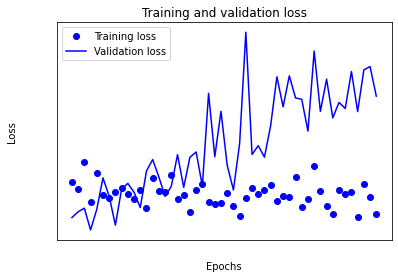

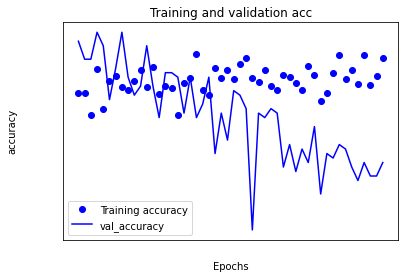

In [126]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

#손실 그래프
# bo: 파란색 점
plt.plot(epochs, loss, 'bo', label='Training loss')
# b : 파란 실선
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.tick_params(labelcolor='white', color='white') #다크모드용 색 지정
plt.legend()

plt.show()

#정확도 그래프
# bo: 파란색 점
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# b : 파란 실선
plt.plot(epochs, val_acc, 'b', label='val_accuracy')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.tick_params(labelcolor='white', color='white') #다크모드용 색 지정
plt.legend()

plt.show()

In [140]:
losses=[]
accs=[]
for i in range(50):
    loss_dif=loss[i] - val_loss[i]
    if loss_dif<0:
        loss_dif=-(loss_dif)
    losses.append(loss_dif)
    acc_dif=acc[i] - val_acc[i]
    if acc_dif<0:
        acc_dif=-(acc_dif) 
    accs.append(acc_dif)
    print("%d회차 - loss: %f, validation loss: %f, accuracy: %f, validation accuracy: %f, loss dif: %s, acc dif: %s" %(i+1, loss[i], val_loss[i], acc[i], val_acc[i], format(losses[i], '.8f'), format(accs[i], '.8f')))
smallest_loss=losses[0]
for j in losses:
    if i < smallest_loss:
        smallest_loss = j
smallest_acc=accs[0]
for k in accs:
    if k < smallest_acc:
        smallest_acc = k

print("최소 손실값 차: %s, %d 회차에서 발생" %(format(smallest_loss, '.8f'), losses.index(smallest_loss)+1))
print("최소 정확도 차: %s, %d 회차에서 발생" %(format(smallest_acc, '.8f'), accs.index(smallest_acc)+1))


1회차 - loss: 0.005044, validation loss: 0.002348, accuracy: 0.998542, validation accuracy: 0.999500, loss dif: 0.00269560, acc dif: 0.00095832
2회차 - loss: 0.004513, validation loss: 0.002785, accuracy: 0.998542, validation accuracy: 0.999167, loss dif: 0.00172866, acc dif: 0.00062501
3회차 - loss: 0.006564, validation loss: 0.003063, accuracy: 0.998125, validation accuracy: 0.999167, loss dif: 0.00350073, acc dif: 0.00104165
4회차 - loss: 0.003515, validation loss: 0.001404, accuracy: 0.998979, validation accuracy: 0.999667, loss dif: 0.00211096, acc dif: 0.00068754
5회차 - loss: 0.005710, validation loss: 0.002974, accuracy: 0.998250, validation accuracy: 0.999417, loss dif: 0.00273588, acc dif: 0.00116664
6회차 - loss: 0.004095, validation loss: 0.005369, accuracy: 0.998771, validation accuracy: 0.998417, loss dif: 0.00127350, acc dif: 0.00035417
7회차 - loss: 0.003840, validation loss: 0.003966, accuracy: 0.998854, validation accuracy: 0.999000, loss dif: 0.00012541, acc dif: 0.00014585
8회차 - 